In [1]:
!pip install permute==0.1a4

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
!pip install arch==4.7.0

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import itertools
import scipy.stats as st
from statsmodels.stats.descriptivestats import sign_test
from permute.core import one_sample
from arch.bootstrap import IIDBootstrap

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad-2020/master/homework_data/sem_3/grigorev.ad.csv
data = pd.read_csv('D:\\psad\\hw3\\varenik.nv.csv', header=None).values.reshape(1, -1)[0]

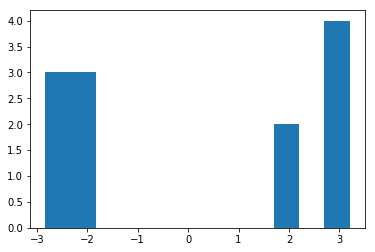

In [5]:
plt.hist(data, bins=12);

In [6]:
# t-test не применим, т.к. нет нормальности
_, p_vals = st.shapiro(data)
p_vals

0.004364364314824343

In [7]:
# Уилкоксон
_, p_vals = st.wilcoxon(data)
print(round(p_vals, 2))

1.0


In [8]:
# Критерий знаков
_, p_vals = sign_test(data)
print(round(p_vals, 2))

1.0


In [9]:
# Число перестановок
print(2**data.shape[0])

4096


In [10]:
count = 0
good = 0
T = data - 0.5
t = np.sum(T)
for v in itertools.product([-1, 1], repeat=12):
    count += 1
    stat = np.dot(T, v)
    if stat <= t:
        good += 1
          
good

1205

In [11]:
# Бутстреп
bs = IIDBootstrap(data)
print(bs.conf_int(np.mean, method='basic'))

[[-1.29275136]
 [ 1.42543216]]


In [85]:
p_vals, test_stat, stats_list = one_sample(data-0.5, reps=4096, alternative='two-sided', keep_dist=True)
p_vals, test_stat

(0.698486328125, -0.40943725302520345)

In [86]:
# Количество перестановок, для которых значение статистики меньше значения оригинальной статистики 
stats_array = np.array(stats_list)
print(stats_array[stats_array <= test_stat].shape[0])

1235
